### How are sprint speed, height and acceleration related?
 The dataset of interest is the kaggle soccer dataset

>getting the data and initial wrangling

In [1]:
# importing important libraries
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
sys.setrecursionlimit(1000000)



In [2]:
# extracting the dataset
cnt = sqlite3.connect('database.sqlite')
game_query = """
SELECT cy.name, lg.name , lg.id, mt.season, mt.stage, mt.date, mt.match_api_id, mt.home_team_api_id, 
mt.away_team_api_id,mt.home_team_goal
FROM country cy
 JOIN league lg ON cy.id =lg.id
 JOIN match mt ON mt.id = lg.id """
 
team_query = """SELECT tm.team_api_id, tm.team_fifa_api_id, tm.team_long_name,
tm.team_short_name, tm_at.buildUpPlaySpeed, tm_at.buildUpPlaySpeedClass, tm_at.buildUpPlayDribbling, 
tm_at.buildUpPlayDribblingClass, tm_at.buildUpPlayPassing, tm_at.buildUpPlayPassingClass 
FROM team tm 
JOIN team_Attributes tm_at ON tm.id = tm_at.id"""

player_query = """
SELECT py.player_api_id, py.player_fifa_api_id,
py.height, py.weight, py_at.overall_rating, py_at.potential, py_at.crossing, py_at.finishing, py_at.heading_accuracy, py_at.short_passing, py_at.volleys,
py_at.dribbling, py_at.curve ,py_at.free_kick_accuracy, py_at.long_passing, py_at.ball_control, py_at.acceleration, 
py_at.sprint_speed,py_at.reactions, py_at.balance, py_at.shot_power, py_at.stamina, 
py_at.strength, py_at.long_shots, py_at.aggression , py_at.positioning, py_at.penalties,
py_at.marking, py_at.standing_tackle, py_at.sliding_tackle
FROM player py
JOIN player_Attributes py_at ON py.id = py_at.id
"""
game = pd.read_sql_query(game_query, cnt)
team =pd.read_sql_query(team_query, cnt)
play =pd.read_sql_query(player_query, cnt)

In [3]:
#exploring the dataset
play.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_api_id       11060 non-null  int64  
 1   player_fifa_api_id  11060 non-null  int64  
 2   height              11060 non-null  float64
 3   weight              11060 non-null  int64  
 4   overall_rating      11021 non-null  float64
 5   potential           11021 non-null  float64
 6   crossing            11021 non-null  float64
 7   finishing           11021 non-null  float64
 8   heading_accuracy    11021 non-null  float64
 9   short_passing       11021 non-null  float64
 10  volleys             10935 non-null  float64
 11  dribbling           11021 non-null  float64
 12  curve               10935 non-null  float64
 13  free_kick_accuracy  11021 non-null  float64
 14  long_passing        11021 non-null  float64
 15  ball_control        11021 non-null  float64
 16  acce

In [4]:
play.shape

(11060, 30)

In [5]:
team.info()
#team needs to replace missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   team_api_id                21 non-null     int64  
 1   team_fifa_api_id           19 non-null     float64
 2   team_long_name             21 non-null     object 
 3   team_short_name            21 non-null     object 
 4   buildUpPlaySpeed           21 non-null     int64  
 5   buildUpPlaySpeedClass      21 non-null     object 
 6   buildUpPlayDribbling       7 non-null      float64
 7   buildUpPlayDribblingClass  21 non-null     object 
 8   buildUpPlayPassing         21 non-null     int64  
 9   buildUpPlayPassingClass    21 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.8+ KB


In [6]:
team.head()

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass
0,9987,673.0,KRC Genk,GEN,60,Balanced,NaN,Little,50,Mixed
1,9993,675.0,Beerschot AC,BAC,52,Balanced,48.0,Normal,56,Mixed
2,10000,15005.0,SV Zulte-Waregem,ZUL,47,Balanced,41.0,Normal,54,Mixed
3,9994,2007.0,Sporting Lokeren,LOK,70,Fast,NaN,Little,70,Long
4,9984,1750.0,KSV Cercle Brugge,CEB,47,Balanced,NaN,Little,52,Mixed


In [7]:
team.shape

(21, 10)

In [8]:
game.head()

,name,name,id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal
0,Belgium,Belgium Jupiler League,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1
1,England,England Premier League,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1
2,France,France Ligue 1,4769,2008/2009,1,2008-08-09 00:00:00,483129,8583,9830,2
3,Germany,Germany 1. Bundesliga,7809,2008/2009,1,2008-08-15 00:00:00,499317,9823,9790,2
4,Italy,Italy Serie A,10257,2008/2009,1,2008-08-31 00:00:00,537632,8524,8551,1


In [9]:
game.shape

(11, 10)

In [10]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              11 non-null     object
 1   name              11 non-null     object
 2   id                11 non-null     int64 
 3   season            11 non-null     object
 4   stage             11 non-null     int64 
 5   date              11 non-null     object
 6   match_api_id      11 non-null     int64 
 7   home_team_api_id  11 non-null     int64 
 8   away_team_api_id  11 non-null     int64 
 9   home_team_goal    11 non-null     int64 
dtypes: int64(6), object(4)
memory usage: 1008.0+ bytes


       Fixing  missing values 

In [11]:
mean_tm = team['buildUpPlayDribbling'].mean()
team['buildUpPlayDribbling'].fillna(mean_tm, inplace = True)
team.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   team_api_id                21 non-null     int64  
 1   team_fifa_api_id           19 non-null     float64
 2   team_long_name             21 non-null     object 
 3   team_short_name            21 non-null     object 
 4   buildUpPlaySpeed           21 non-null     int64  
 5   buildUpPlaySpeedClass      21 non-null     object 
 6   buildUpPlayDribbling       21 non-null     float64
 7   buildUpPlayDribblingClass  21 non-null     object 
 8   buildUpPlayPassing         21 non-null     int64  
 9   buildUpPlayPassingClass    21 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.8+ KB


In [12]:
team.head()

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass
0,9987,673.0,KRC Genk,GEN,60,Balanced,52.428571,Little,50,Mixed
1,9993,675.0,Beerschot AC,BAC,52,Balanced,48.000000,Normal,56,Mixed
2,10000,15005.0,SV Zulte-Waregem,ZUL,47,Balanced,41.000000,Normal,54,Mixed
3,9994,2007.0,Sporting Lokeren,LOK,70,Fast,52.428571,Little,70,Long
4,9984,1750.0,KSV Cercle Brugge,CEB,47,Balanced,52.428571,Little,52,Mixed


>Since the primary table of interest is the play table my focus will be on this table 
Replacing missing values on data

In [13]:
#fixing rating and potential missing values
replace = play.columns
for item in replace:
    mean_fn = play[item].mean()
    play[item].fillna(mean_fn, inplace = True)
        

In [14]:

play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_api_id       11060 non-null  int64  
 1   player_fifa_api_id  11060 non-null  int64  
 2   height              11060 non-null  float64
 3   weight              11060 non-null  int64  
 4   overall_rating      11060 non-null  float64
 5   potential           11060 non-null  float64
 6   crossing            11060 non-null  float64
 7   finishing           11060 non-null  float64
 8   heading_accuracy    11060 non-null  float64
 9   short_passing       11060 non-null  float64
 10  volleys             11060 non-null  float64
 11  dribbling           11060 non-null  float64
 12  curve               11060 non-null  float64
 13  free_kick_accuracy  11060 non-null  float64
 14  long_passing        11060 non-null  float64
 15  ball_control        11060 non-null  float64
 16  acce

#### Data wrangling
The dataset had seven tables but I narrowed down to the last three _ player and player_attributes _ joined them to a table which I named  *play*

The table play had some missing values in a few of the columns I used loop to fix the missing data in the columns by creating a variable named replace which had a list of all the columns obtained by using pandas.column

At first I fixed missing values in the team column but I did not use its dataset because it had few options from which I could explore
I had to remove the player name column because the fillna using mean was not working with the string object

In [15]:
play.describe()

,player_api_id,player_fifa_api_id,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,...,shot_power,stamina,strength,long_shots,aggression,positioning,penalties,marking,standing_tackle,sliding_tackle
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,...,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,156582.427215,165664.910488,181.867445,168.380289,68.546956,73.888758,55.313129,51.112240,56.624989,62.900372,...,62.339352,67.137646,66.514563,54.635151,60.514835,57.153071,55.227656,45.702386,49.648852,47.100229
std,160713.700624,58649.928360,6.369201,14.990217,7.079292,6.515596,16.733720,18.568472,15.783017,14.059144,...,15.722595,13.118304,12.626841,17.893527,15.865747,17.801735,14.955073,21.008586,21.244177,21.258454
min,2625.000000,2.000000,157.480000,117.000000,40.000000,51.000000,6.000000,2.000000,3.000000,3.000000,...,6.000000,14.000000,20.000000,3.000000,10.000000,3.000000,6.000000,1.000000,2.000000,2.000000
25%,35555.500000,151889.500000,177.800000,159.000000,64.000000,69.000000,45.000000,36.750000,48.000000,58.000000,...,55.000000,61.000000,59.000000,43.000000,50.000000,48.000000,46.000000,25.000000,29.000000,25.000000
50%,96619.500000,184671.000000,182.880000,168.000000,69.000000,74.000000,59.000000,55.000000,59.000000,66.000000,...,65.000000,69.000000,68.000000,59.000000,63.000000,61.000000,56.000000,47.000000,54.000000,48.000000
75%,212470.500000,203883.250000,185.420000,179.000000,74.000000,78.000000,68.000000,66.000000,67.000000,73.000000,...,74.000000,76.000000,75.000000,68.000000,73.000000,70.000000,66.000000,65.000000,68.000000,66.000000
max,750584.000000,234141.000000,208.280000,243.000000,91.000000,93.000000,92.000000,93.000000,93.000000,92.000000,...,96.000000,94.000000,95.000000,93.000000,94.000000,95.000000,94.000000,94.000000,95.000000,90.000000


## How are sprint speed, height and acceleration related?


 #### Checking the distribution of sprint speed using histograms

68.87650848380359


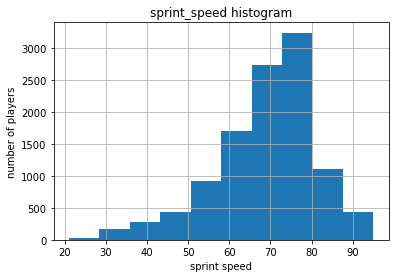

In [16]:
play['sprint_speed'].hist()
plt.title('sprint_speed histogram')
plt.xlabel('sprint speed')
plt.ylabel('number of players')


#### Viewing how players are distribed over sprint speed 
Most players are have a high sprint speed but the outliers are less than thirty and greater then 90

######  * Using scatter plots to find the relationships between acceleration sprint speed and height *

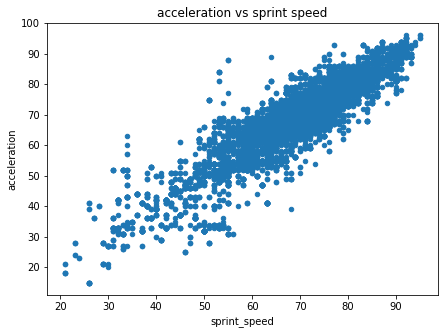

In [17]:
play.plot(x ='sprint_speed', y ='acceleration', kind ='scatter',figsize=(7,5))
plt.title('acceleration vs sprint speed');

####Vieing the relationship between sprint speed and acceleration the data seems to have a strong relationship

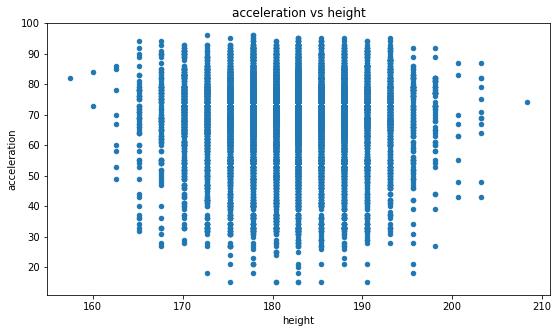

In [18]:
play.plot(x ='height', y ='acceleration', kind ='scatter', figsize =(9,5))
plt.title('acceleration vs height');

#### Viewing the relationship between acceleration and height. This chart is hard to judge because the data is scattered almost in one place yet its also scattered around everywhere

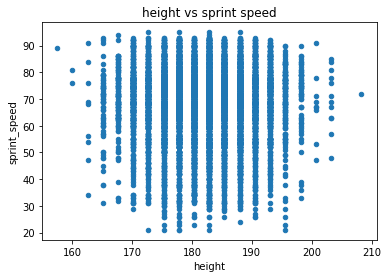

In [19]:
play.plot(x ='height', y ='sprint_speed', kind ='scatter')
plt.title('height vs sprint speed');

##### Viewing the relationship between sprint speed and height. This chart is hard to judge because the data is scattered almost in one place yet its also scattered around everywhere

### CONCLUSION

It seems to me there is a *storng  relationships * between acceleration and sprint_speed of a player
But the height has a _weak _relationship between height and sprint speed also height and acceleration has a weak relationship in comparison to  sprint speed and acceleration

##Limitations
Few columns in the team tables prevented better analysis of the data set
The dataset in the match and league table also had few columns that could make the dataset generate useful insight
Some of the colums like team api id was not useful in helping generating insight from the data.